<a href="https://colab.research.google.com/github/dhivyasreedhar/GSOC2023/blob/main/gsoc_test_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import *
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import roc_curve, auc
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
#roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification
# from sklearn.neighbors import KNeighbors Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation
from sklearn import metrics

In [5]:
img_rows, img_cols, nb_channels = 32, 32, 2
input_dir= '/content'
decays=['SingleElectronPt50_IMGCROPS_n249k_RHv1', 'SinglePhotonPt50_IMGCROPS_n249k_RHv1']
def load_data(decays, start, stop):
  global input_dir
  dsets = [h5py.File('%s/%s.hdf5'% (input_dir,decay)) for decay in decays]
  X = np. concatenate([dset['/X' ][start:stop] for dset in dsets])
  y = np. concatenate ([dset['/y'][start:stop] for dset in dsets])
  assert len(X) == len (y)
  return X, y

In [6]:
lr_init = 1.e-3
batch_size = 64
epochs = 20
start =0
stop = 16000


In [7]:
X, y = load_data(decays, start, stop) #use train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=24)
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, test_size=0.1, random_state=2)

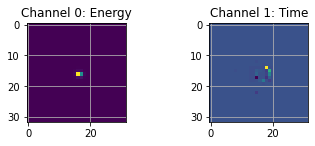

In [8]:
plt. figure (1)
plt.subplot (221)
plt.imshow(X_train[1,:,:,0])
plt.title("Channel 0: Energy") # Energy
plt.grid(True)
plt.subplot (222)
plt.imshow (X_train[1,:,:,1])
plt.title("Channel 1: Time") # Time
plt.grid (True)
plt.show()

In [9]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,2)))

model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers. Flatten())

model.add(layers.Dense (64, activation='relu'))

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.compile(

loss=tf.keras. losses.binary_crossentropy,

optimizer=tf.keras.optimizers.Adam(learning_rate=1.e-3),

metrics=[tf.keras.metrics.BinaryAccuracy (name='accuracy')]
)

In [11]:
model.fit(X_train, y_train, batch_size=32, epochs=15, validation_data=(X_val, y_val), verbose=2)

Epoch 1/15
720/720 - 17s - loss: 0.6822 - accuracy: 0.5508 - val_loss: 0.6575 - val_accuracy: 0.6109 - 17s/epoch - 24ms/step
Epoch 2/15
720/720 - 4s - loss: 0.6600 - accuracy: 0.6072 - val_loss: 0.6505 - val_accuracy: 0.6145 - 4s/epoch - 5ms/step
Epoch 3/15
720/720 - 4s - loss: 0.6509 - accuracy: 0.6199 - val_loss: 0.6541 - val_accuracy: 0.6184 - 4s/epoch - 5ms/step
Epoch 4/15
720/720 - 4s - loss: 0.6397 - accuracy: 0.6380 - val_loss: 0.6379 - val_accuracy: 0.6340 - 4s/epoch - 6ms/step
Epoch 5/15
720/720 - 4s - loss: 0.6293 - accuracy: 0.6503 - val_loss: 0.6494 - val_accuracy: 0.6254 - 4s/epoch - 5ms/step
Epoch 6/15
720/720 - 4s - loss: 0.6194 - accuracy: 0.6577 - val_loss: 0.6217 - val_accuracy: 0.6574 - 4s/epoch - 5ms/step
Epoch 7/15
720/720 - 4s - loss: 0.6126 - accuracy: 0.6700 - val_loss: 0.6231 - val_accuracy: 0.6488 - 4s/epoch - 5ms/step
Epoch 8/15
720/720 - 3s - loss: 0.6064 - accuracy: 0.6772 - val_loss: 0.6293 - val_accuracy: 0.6551 - 3s/epoch - 5ms/step
Epoch 9/15
720/720 - 

In [14]:
y_pred = model.predict(X_test)

200/200 [==============================] - 1s 3ms/step


In [17]:
print("ROC-AUC Score:", metrics.roc_auc_score(y_test, y_pred))
print("AP Score:", metrics.average_precision_score(y_test, y_pred))

ROC-AUC Score: 0.713496730828882
AP Score: 0.6600779853765169
